<a href="https://colab.research.google.com/github/BautistaDavid/FICS-Colombia-Exploration/blob/main/Grafico_Top_FICS_x_Clientes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [129]:
import pandas as pd
import warnings
import numpy as np
import seaborn as sns
import matplotlib as mpl
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

In [130]:
def get_data(month,year):
  """
  Función para procesar archivos csv de la superfinanciera cargados en el repositorio de github del proyecto.
  """

  root_url = f"https://github.com/BautistaDavid/FICS-Colombia-Exploration/raw/refs/heads/main/Data/{year}/reporte{month}.xls"

  df = pd.read_excel(root_url,dtype='str')
  df.columns = df.columns.str.lower(
              ).str.replace('ó','o').str.replace('ú','u'
              ).str.replace('.','').str.replace('/','').str.replace('í','i'
              ).str.replace('<sup>1<sup>','').str.replace('  ',' '
              ).str.strip().str.replace(' ','_')

  df['num_invers'] = df['num_invers'].astype('float')
  df['fecha_corte'] = pd.to_datetime(df['fecha_corte'],dayfirst=True)

  df['nombre_negocio'] = df['nombre_negocio'].str.lower(
      ).str.replace('ó','o').str.replace(
          '  ',' ').str.replace('fondo de inversion colectiva','fic')
  return df


In [131]:
year = "2024"
month = "Diciembre"
df = get_data(month,year)
df = df[df['fecha_corte']=='2024-12-31']


tab = df.groupby(['nombre_entidad','nombre_negocio'])['num_invers'].sum().sort_values(ascending=False).reset_index()
tab['num_invers'] = tab['num_invers'] / 1000
tab['nombre_negocio'] = tab['nombre_negocio'].str.title().str.strip()
tab['nombre_negocio'] = tab['nombre_negocio'].str.replace('Universitas Fic Abierto Con Pacto De Permanencia', 'Universitas Fic Abierto\nCon Pacto De Permanencia',)
tab['nombre_negocio'] = tab['nombre_negocio'].str.replace('Fic Abierto Con Pacto De Permanencia Plan Semilla', 'Fic Abierto Con Pacto\nDe Permanencia Plan Semilla',)
tab['nombre_negocio'] = tab['nombre_negocio'].str.replace('Fic Abierto Bbva Fam Con Participaciones Diferenciales', 'Fic Abierto Bbva Fam Con\nParticipaciones Diferenciales')
tab['nombre_negocio'] = tab['nombre_negocio'].str.replace('Fic Abierto Bbva Digital Con Participaciones Diferenciales',  'Fic Abierto Bbva Digital Con\nParticipaciones Diferenciales')
tab['nombre_negocio'] = tab['nombre_negocio'].str.replace('Fic Abierto Con Pacto De Permanencia Fidurenta', 'Fic Abierto Con Pacto\nDe Permanencia Fidurenta')


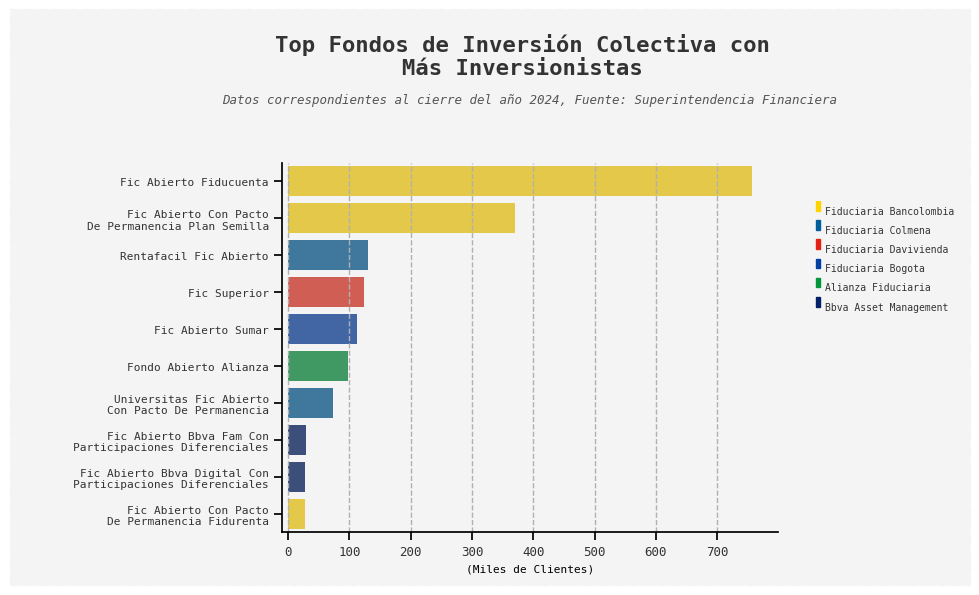

In [141]:
# Asignamos un estilo pre establecido de seaborn
sns.set_context("notebook")

# Creamos la figura
fig, ax = plt.subplots(1,1)

# Modificamos estilo de fuente del grafico
mpl.rc('font', family='monospace', size=12)

# Estructuramos el barplot
sns.barplot(data=tab.head(10),y='nombre_negocio',x='num_invers',alpha=0.8,color='red',
            palette=
['#FFD200','#FFD200','#005D9B','#E32213','#003DA5','#009639','#005D9B','#012169','#012169','#FFD200'])

# Modificamos parametros de ticks y labels
plt.yticks(fontsize=8,color='#333333')
plt.xticks(fontsize=9,color='#333333')
plt.xlabel('(Miles de Clientes)',fontsize=8)
plt.ylabel('')

# Modificamos parametros de la grilla y el background
ax.set_facecolor("#F4F4F4")
plt.grid(axis='x',linestyle='--')
plt.xlim(-10,799)

# Cramos un Titulo y subtitulo
plt.suptitle(
    'Top Fondos de Inversión Colectiva con\nMás Inversionistas',
    fontsize=16, color='#333333', weight='bold', ha='center', y=1.15)

plt.title(
    'Datos correspondientes al cierre del año 2024, Fuente: Superintendencia Financiera',
    fontsize=9, color='#555555', style='italic', ha='center', y=1.14)

# Borramos linea de la derecha y superior del cuadro que encierra el grafico.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Creamos una figura mas grande que estara detras del grafico principal para encerrar todo

rect = Rectangle(
    (-0.3, 0), 1.5, 1.2,
    transform=fig.transFigure,
    color="#F4F4F4",
    fill=True,
    linewidth=1,
    linestyle='-.',
    zorder=-1
)

# Creamos el indice que diferencia la compañia

companias = ['Fiduciaria Bancolombia', 'Fiduciaria Colmena',
       'Fiduciaria Davivienda', 'Fiduciaria Bogota', 'Alianza Fiduciaria',
       'Bbva Asset Management']

colores = ['#FFD200','#005D9B','#E32213','#003DA5','#009639','#012169']

# Agregamos un subgrafico para poder crear las anotaciones de las compañias
legend_ax = fig.add_axes([0.95, 0.4, 0.1, 0.4])
legend_ax.axis('off')
for i, (color, compania) in enumerate(zip(colores, companias)):
    y_pos =  0.95 - i * 0.1
    legend_ax.add_patch(Rectangle((0.1, y_pos), 0.05, 0.05, color=color))  # Cuadro más pequeño y vertical
    legend_ax.text(0.23, y_pos , compania, fontsize=7, ha='left', va='center', color='#333333')

fig.patches.append(rect)

# Guardamos grafico en formato png
plt.savefig('grafico_fondos_inversion.png', dpi=300, bbox_inches='tight')
plt.show()